In [1]:
import cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read() #read one frame
cap.release()
cv2.imshow('image', frame)
cv2.imwrite("framed.jpg", frame)  
if cv2.waitKey(0) & 0xff == ord('q'): # press q to exit
    cv2.destroyAllWindows()

In [2]:
from keras.models import load_model

model = load_model('my_modelv3.h5')
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_291 (Flatten)       (None, 2048)              0         
                                                                 
 dense_1016 (Dense)          (None, 6)                 12294     
                                                                 
Total params: 23,600,006
Trainable params: 12,294
Non-trainable params: 23,587,712
_____________________________________

In [37]:
# demonstrate face detection on 5 Celebrity Faces Dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from numpy import asarray
from matplotlib import pyplot
from mtcnn import MTCNN
from os import listdir

def extract_face(filename, required_size=(200, 200)):
    # load image from file
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    # use MTCNN face detector to detect faces inside the image
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

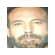

In [38]:
pixels = extract_face('../Desktop/framed.jpg')
hello = []
pyplot.subplot(2, 7, 1)
pyplot.axis('off')
pyplot.imshow(pixels)
pyplot.show()
pixels = pixels.astype('float32')
pixels = np.array(pixels)
hello.append(pixels)
hello = np.array(hello)

In [39]:
yhat=model.predict(hello)
print("prediction shape:", yhat)

prediction shape: [[0.2885074  0.46903995 0.03692678 0.17537315 0.00256144 0.02759128]]


In [40]:
from tensorflow.keras.utils import to_categorical
y_test = []
i = 0
for subdir, dirs, files in os.walk("../Desktop/celeb/val"):
    if i == 0:
        y_test = dirs
    i = 1



In [41]:
prediction_index = np.argmax(yhat, axis=None, out=None)
prediction = y_test[prediction_index]

print("The person is: " + prediction)



The person is: jonathandoe
